# Imports

In [24]:
## imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import os
root = os.path.expanduser('~')

# company_index='5'
# company_name='Amazon'
# img_path = root + '/Desktop/workspace/indeed/Job-Satisfaction/img/companies/'\
#             +f'{company_index}_{company_name}'
# img_path = root + '/Desktop/Paper/img'
# img_flag = False

# if not os.path.exists(img_path):
#     os.makedirs(img_path)
# model_path = root + '/Desktop/workspace/indeed/Job-Satisfaction/analysis2/models'
# if not os.path.exists(model_path):
#     os.makedirs(model_path)

# Data Load

In [78]:
pc_flag = 'pro'
sector = 'Financials'

sentences = pd.\
read_csv(f'~/Desktop/workspace/indeed/Job-Satisfaction/data/sector/{sector}/{pc_flag}/{pc_flag}px.csv')


# sentences = pd.\
# read_csv(f'~/Desktop/workspace/indeed/Job-Satisfaction/data/prepx/{pc_flag}_doc_all.csv')


sentences.shape

(48865, 15)

In [79]:
# display(sentences)
sents = sentences.Px_Texts.values
print(len(sents))
count = 0
for sent in sents[:5]:
    if (len(sent.split()) <= 0) :
        count += 1
print(count)
        
    


48865
0


# Tokenization

In [80]:
df = sentences.copy()

data_px = [sents.split() for sents in df.Px_Texts.values]
print(len(data_px))
# data_px = df['Px_Texts'].str.split().values
# data_px


48865


# Build Dictionary

In [81]:
# Create Dictionary
id2word = corpora.Dictionary(data_px) ##dictionary
print(len(id2word))
print(id2word)

# Create Corpus
texts = data_px 

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]  ##corpus

# View
print(corpus[:5])

4978
Dictionary(4978 unique tokens: ['cowork', 'control', 'control_hoursto', 'control_hoursto_degre', 'degre']...)
[[(0, 1)], [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)], [(7, 1)], [(8, 1)], [(9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]]


# LDA

In [63]:
def lda_viz(num_topics): 

    # %%time
    # Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
    num_topics = num_topics
    mallet_path = root + '/Downloads/mallet-2.0.8/bin/mallet' # update this path
#     ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, iterations=500, random_seed=42)
    ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed=42)


    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=ldamallet, texts=data_px, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('\nCoherence Score: ', coherence_lda)


    ##mallet model to lda model conversion
    optimal_model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)

    # %%time
    # Visualize the topics
    pyLDAvis.enable_notebook()
    # vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word, mds='tsne')
    vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
    return vis, optimal_model
    # pyLDAvis.show(vis)

In [19]:
viz = lda_viz(22)
viz


Coherence Score:  0.4136915825838335


/usr/local/lib/python3.7/site-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/usr/local/lib/python3.7/site-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/usr/local/lib/python3.7/site-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
9     -0.123441 -0.255076       1        1  4.682878
16    -0.149448 -0.351700       2        1  4.666665
0     -0.099249  0.101462       3        1  4.640706
4     -0.137055 -0.242520       4        1  4.590224
1     -0.090467  0.065887       5        1  4.569025
11    -0.091901  0.073649       6        1  4.564171
3     -0.085807  0.100522       7        1  4.554090
15     0.162245  0.018958       8        1  4.547927
10    -0.096431  0.090353       9        1  4.540123
2     -0.088065  0.076687      10        1  4.535334
20    -0.087658  0.084102      11        1  4.530220
18    -0.102677  0.096105      12        1  4.523895
13    -0.110842 -0.081217      13        1  4.521577
17    -0.092189  0.079535      14        1  4.520728
19    -0.102182  0.103408      15        1  4.518947
8      0.314882 -0.033287      16        1  4.518105
14    -0.092947  0.065165      17        1  4.513431
21     0.209731  0.003178      18        1  4.500401
12    -0.092736  0.079782      19        1  4.500326
6      0.309932 -0.019295      20        1  4.494009
7      0.348872 -0.029503      21        1  4.484849
5      0.297434 -0.026196      22        1  4.482368, topic_info=          Term         Freq        Total Category  logprob  loglift
0      benefit  8160.000000  8160.000000  Default  30.0000  30.0000
22         pay  4972.000000  4972.000000  Default  29.0000  29.0000
31       peopl  2682.000000  2682.000000  Default  28.0000  28.0000
40        free  3149.000000  3149.000000  Default  27.0000  27.0000
15       lunch  2428.000000  2428.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
1219     plant    25.646416    26.686962  Topic22  -5.5365   3.0652
22         pay   839.920136  4972.552209  Topic22  -2.0476   1.3266
1672  outstand    30.989420    39.493040  Topic22  -5.3473   2.8625
0      benefit  1033.336859  8160.446756  Topic22  -1.8404   1.0385
5220     googl    24.577816    34.032165  Topic22  -5.5791   2.7796

[1527 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
143       4  0.981027    15_min_break
136       4  1.001465  15_minut_break
27        4  0.998238    1_hour_lunch
239       4  0.981027      1_hr_lunch
468       4  0.981027      2_15_minut
...     ...       ...             ...
416      16  0.014357           world
939      14  0.994889         wouldnt
1941      4  0.981027            xbox
1040     20  1.027062              ye
1215     10  0.991361          yearli

[1851 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 17, 1, 5, 2, 12, 4, 16, 11, 3, 21, 19, 14, 18, 20, 9, 15, 22, 13, 7, 8, 6])

# Finding Optimal Model

In [119]:
#parameter tuning (finding the best model)
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    mallet_path = root + '/Downloads/mallet-2.0.8/bin/mallet' # update this path
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, 
                                                  random_seed=42)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [120]:
#  Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_px, start=4, limit=21, step=2)

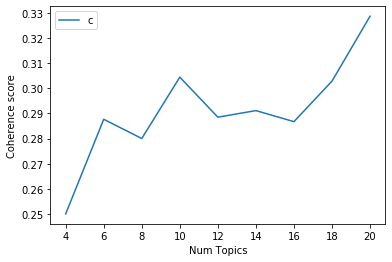

In [123]:
# Show graph
limit=21; start=4; step=2;

x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.xticks(range(4, 21, 2))
plt.savefig(root + '/Desktop/paper_fig/lda/con/coherence.png')
plt.show()

In [124]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 4  has Coherence Value of 0.2501
Num Topics = 6  has Coherence Value of 0.2877
Num Topics = 8  has Coherence Value of 0.28
Num Topics = 10  has Coherence Value of 0.3044
Num Topics = 12  has Coherence Value of 0.2885
Num Topics = 14  has Coherence Value of 0.2911
Num Topics = 16  has Coherence Value of 0.2867
Num Topics = 18  has Coherence Value of 0.3028
Num Topics = 20  has Coherence Value of 0.3286


# Optimal Model Visualization

In [82]:
num_topics = 8
vis, optimal_model = lda_viz(num_topics)
vis



Coherence Score:  0.3030785812084102


/Users/bishalsainju/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/Users/bishalsainju/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/Users/bishalsainju/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)
/Users/bishalsainju/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.107101  0.063013  1       1        12.641401
0      0.198142 -0.205900  2       1        12.603656
6     -0.254355  0.010225  3       1        12.546063
5      0.194452  0.370857  4       1        12.484341
1      0.212494  0.040784  5       1        12.454038
4      0.175702 -0.230303  6       1        12.446951
3     -0.206198 -0.078303  7       1        12.419738
7     -0.213136  0.029627  8       1        12.403812, topic_info=    Category          Freq             Term         Total  loglift  logprob
81   Default  10898.000000  benefit          10898.000000  30.0000  30.0000
82   Default  3915.000000   pay              3915.000000   29.0000  29.0000
44   Default  2830.000000   lunch            2830.000000   28.0000  28.0000
35   Default  2460.000000   free             2460.000000   27.0000  27.0000
7    Default  2334.000000   peopl            2334.000000   26.0000  26.0000
..       ...          ...     ...                    ...       ...      ...
26   Topic8   167.873933    relationship     168.889305    2.0811  -4.7121 
847  Topic8   171.993538    monthli          174.053011    2.0753  -4.6878 
780  Topic8   130.797481    compens_benefit  131.827218    2.0793  -4.9616 
324  Topic8   220.398906    money            264.992085    1.9029  -4.4398 
81   Topic8   2245.185113   benefit          10898.149174  0.5074  -2.1187 

[531 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
1004  2      0.995134  1_hour_lunch   
1968  8      0.970967  2_day_home     
925   2      0.995134  401k_paid_vacat
799   1      0.041872  abil           
799   2      0.003489  abil           
...  ..           ...   ...           
621   3      1.000788  worklif_balanc 
2111  3      0.959693  workperson     
508   5      1.000498  workplac       
1633  1      0.964273  wrong          
2829  6      0.971122  york           

[549 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 7, 6, 2, 5, 4, 8])

In [83]:
# pyLDAvis.save_html(vis, root + '/Desktop/paper_fig/lda/pro/lda_viz.html')

## Topic Composition

In [84]:
# num_topics = 16

# mallet_path = root + '/Downloads/mallet-2.0.8/bin/mallet'
# # ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, iterations=500, random_seed=42)
# ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed=42)

# optimal_model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)

In [85]:
# Print the topics
model_topics = optimal_model.show_topics(formatted=True, num_topics=num_topics)
# pprint(optimal_model.print_topics(num_words=10))
pprint(model_topics)

[(0,
  '0.149*"lunch" + 0.130*"free" + 0.123*"peopl" + 0.074*"free_lunch" + '
  '0.028*"break" + 0.027*"meet" + 0.020*"hour_lunch" + 0.018*"food" + '
  '0.016*"hour" + 0.015*"event"'),
 (1,
  '0.118*"environ" + 0.068*"cowork" + 0.047*"nice" + 0.038*"fun" + '
  '0.037*"friendli" + 0.031*"locat" + 0.027*"atmospher" + 0.027*"cafeteria" + '
  '0.020*"offic" + 0.018*"worker"'),
 (2,
  '0.098*"time" + 0.059*"paid" + 0.057*"vacat" + 0.051*"home" + '
  '0.047*"benefit" + 0.044*"day" + 0.031*"holiday" + 0.021*"famili" + '
  '0.021*"paid_time" + 0.020*"discount"'),
 (3,
  '0.209*"pay" + 0.201*"benefit" + 0.067*"employe" + 0.059*"hour" + '
  '0.040*"pay_benefit" + 0.029*"decent" + 0.020*"benefit_pay" + '
  '0.018*"benifit" + 0.016*"reward" + 0.012*"decent_pay"'),
 (4,
  '0.110*"manag" + 0.078*"team" + 0.068*"learn" + 0.049*"hour" + 0.048*"lot" + '
  '0.034*"experi" + 0.031*"bank" + 0.022*"flexibl_hour" + 0.021*"staff" + '
  '0.021*"busi"'),
 (5,
  '0.100*"flexibl" + 0.081*"opportun" + 0.067*"sche

In [86]:
## Dominant Topic in each documents

def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data_px):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data_px)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.1416,"environ, cowork, nice, fun, friendli, locat, atmospher, cafeteria, offic, worker",[cowork]
1,1,7.0,0.1295,"benefit, excel, custom, compens, incent, salari, bonus, bonu, excel_benefit, secur","[control, degre, hoursto, control_hoursto, hoursto_degre, control_hoursto_degre]"
2,2,0.0,0.1422,"lunch, free, peopl, free_lunch, break, meet, hour_lunch, food, hour, event",[peopl]
3,3,0.0,0.1250,"lunch, free, peopl, free_lunch, break, meet, hour_lunch, food, hour, event",[none]
4,4,2.0,0.1652,"time, paid, vacat, home, benefit, day, holiday, famili, paid_time, discount","[player, staff, team, staff_team, team_player, staff_team_player]"
5,5,0.0,0.1586,"lunch, free, peopl, free_lunch, break, meet, hour_lunch, food, hour, event","[hour, peopl, hour_peopl]"
6,6,1.0,0.1375,"environ, cowork, nice, fun, friendli, locat, atmospher, cafeteria, offic, worker",[workout]
7,7,4.0,0.1799,"manag, team, learn, hour, lot, experi, bank, flexibl_hour, staff, busi","[client, independ, posit, relationship, schedul, set, staff, client_staff, independ_set, posit_relationship, relationship_client, schedul_posit, set_schedul, independ_set_schedul, posit_relationship_client, relationship_client_staff, schedul_posit_relationship, set_schedul_posit]"
8,8,5.0,0.1652,"flexibl, opportun, schedul, advanc, train, cultur, growth, flexibl_schedul, support, career","[free, train, travel, free_travel, travel_train, free_travel_train]"
9,9,0.0,0.1830,"lunch, free, peopl, free_lunch, break, meet, hour_lunch, food, hour, event","[activ, free, lunch, free_lunch, lunch_activ, free_lunch_activ]"


In [87]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(5)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.2621,"lunch, free, peopl, free_lunch, break, meet, hour_lunch, food, hour, event","[breakfast, free, lunch, meet, pto, sometim, free_breakfast, free_lunch, lunch_pto, sometim_free, free_lunch_pto, sometim_free_lunch]"
1,0.0,0.2585,"lunch, free, peopl, free_lunch, break, meet, hour_lunch, food, hour, event","[event, free, luck, lunch, pot, free_lunch, pot_luck, free_lunch_pot, lunch_pot_luck]"
2,0.0,0.2577,"lunch, free, peopl, free_lunch, break, meet, hour_lunch, food, hour, event","[break, hr, lunch, min, sometim, hr_lunch, lunch_sometim, 15_min_break, 1_hr_lunch]"
3,0.0,0.2574,"lunch, free, peopl, free_lunch, break, meet, hour_lunch, food, hour, event","[allow, bagel, birthday, breakfast, celebr, friday, gather, lunch, manag, month, occas, offer, pot, social]"
4,0.0,0.2573,"lunch, free, peopl, free_lunch, break, meet, hour_lunch, food, hour, event","[agent, break, coffe, cowork, drink, free, hour, lunch, nice, snack, cowork_1, free_coffe, free_snack, hour_lunch, lunch_break, 1_hour_lunch, cowork_1_hour, hour_lunch_break]"


In [88]:
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts().sort_index()
# display(topic_counts)

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4).sort_index()
# display(topic_contribution)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']].drop_duplicates().sort_values(by='Dominant_Topic').set_index('Dominant_Topic')
# display(topic_num_keywords)

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
pd.set_option('display.max_colwidth', -1)
df_dominant_topics

,Topic_Keywords,Num_Documents,Perc_Documents
0.0,"lunch, free, peopl, free_lunch, break, meet, hour_lunch, food, hour, event",8054,0.1648
1.0,"environ, cowork, nice, fun, friendli, locat, atmospher, cafeteria, offic, worker",6238,0.1277
2.0,"time, paid, vacat, home, benefit, day, holiday, famili, paid_time, discount",4805,0.0983
3.0,"pay, benefit, employe, hour, pay_benefit, decent, benefit_pay, benifit, reward, decent_pay",5065,0.1037
4.0,"manag, team, learn, hour, lot, experi, bank, flexibl_hour, staff, busi",5838,0.1195
5.0,"flexibl, opportun, schedul, advanc, train, cultur, growth, flexibl_schedul, support, career",5959,0.1219
6.0,"benefit, balanc, health, pto, life, healthcar, insur, care, life_balanc, worklif",7525,0.1540
7.0,"benefit, excel, custom, compens, incent, salari, bonus, bonu, excel_benefit, secur",5381,0.1101


In [89]:
df_dominant_topic.head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.1416,"environ, cowork, nice, fun, friendli, locat, atmospher, cafeteria, offic, worker",[cowork]
1,1,7.0,0.1295,"benefit, excel, custom, compens, incent, salari, bonus, bonu, excel_benefit, secur","[control, degre, hoursto, control_hoursto, hoursto_degre, control_hoursto_degre]"
2,2,0.0,0.1422,"lunch, free, peopl, free_lunch, break, meet, hour_lunch, food, hour, event",[peopl]
3,3,0.0,0.1250,"lunch, free, peopl, free_lunch, break, meet, hour_lunch, food, hour, event",[none]
4,4,2.0,0.1652,"time, paid, vacat, home, benefit, day, holiday, famili, paid_time, discount","[player, staff, team, staff_team, team_player, staff_team_player]"


0
1
2
3
4
5
6
7


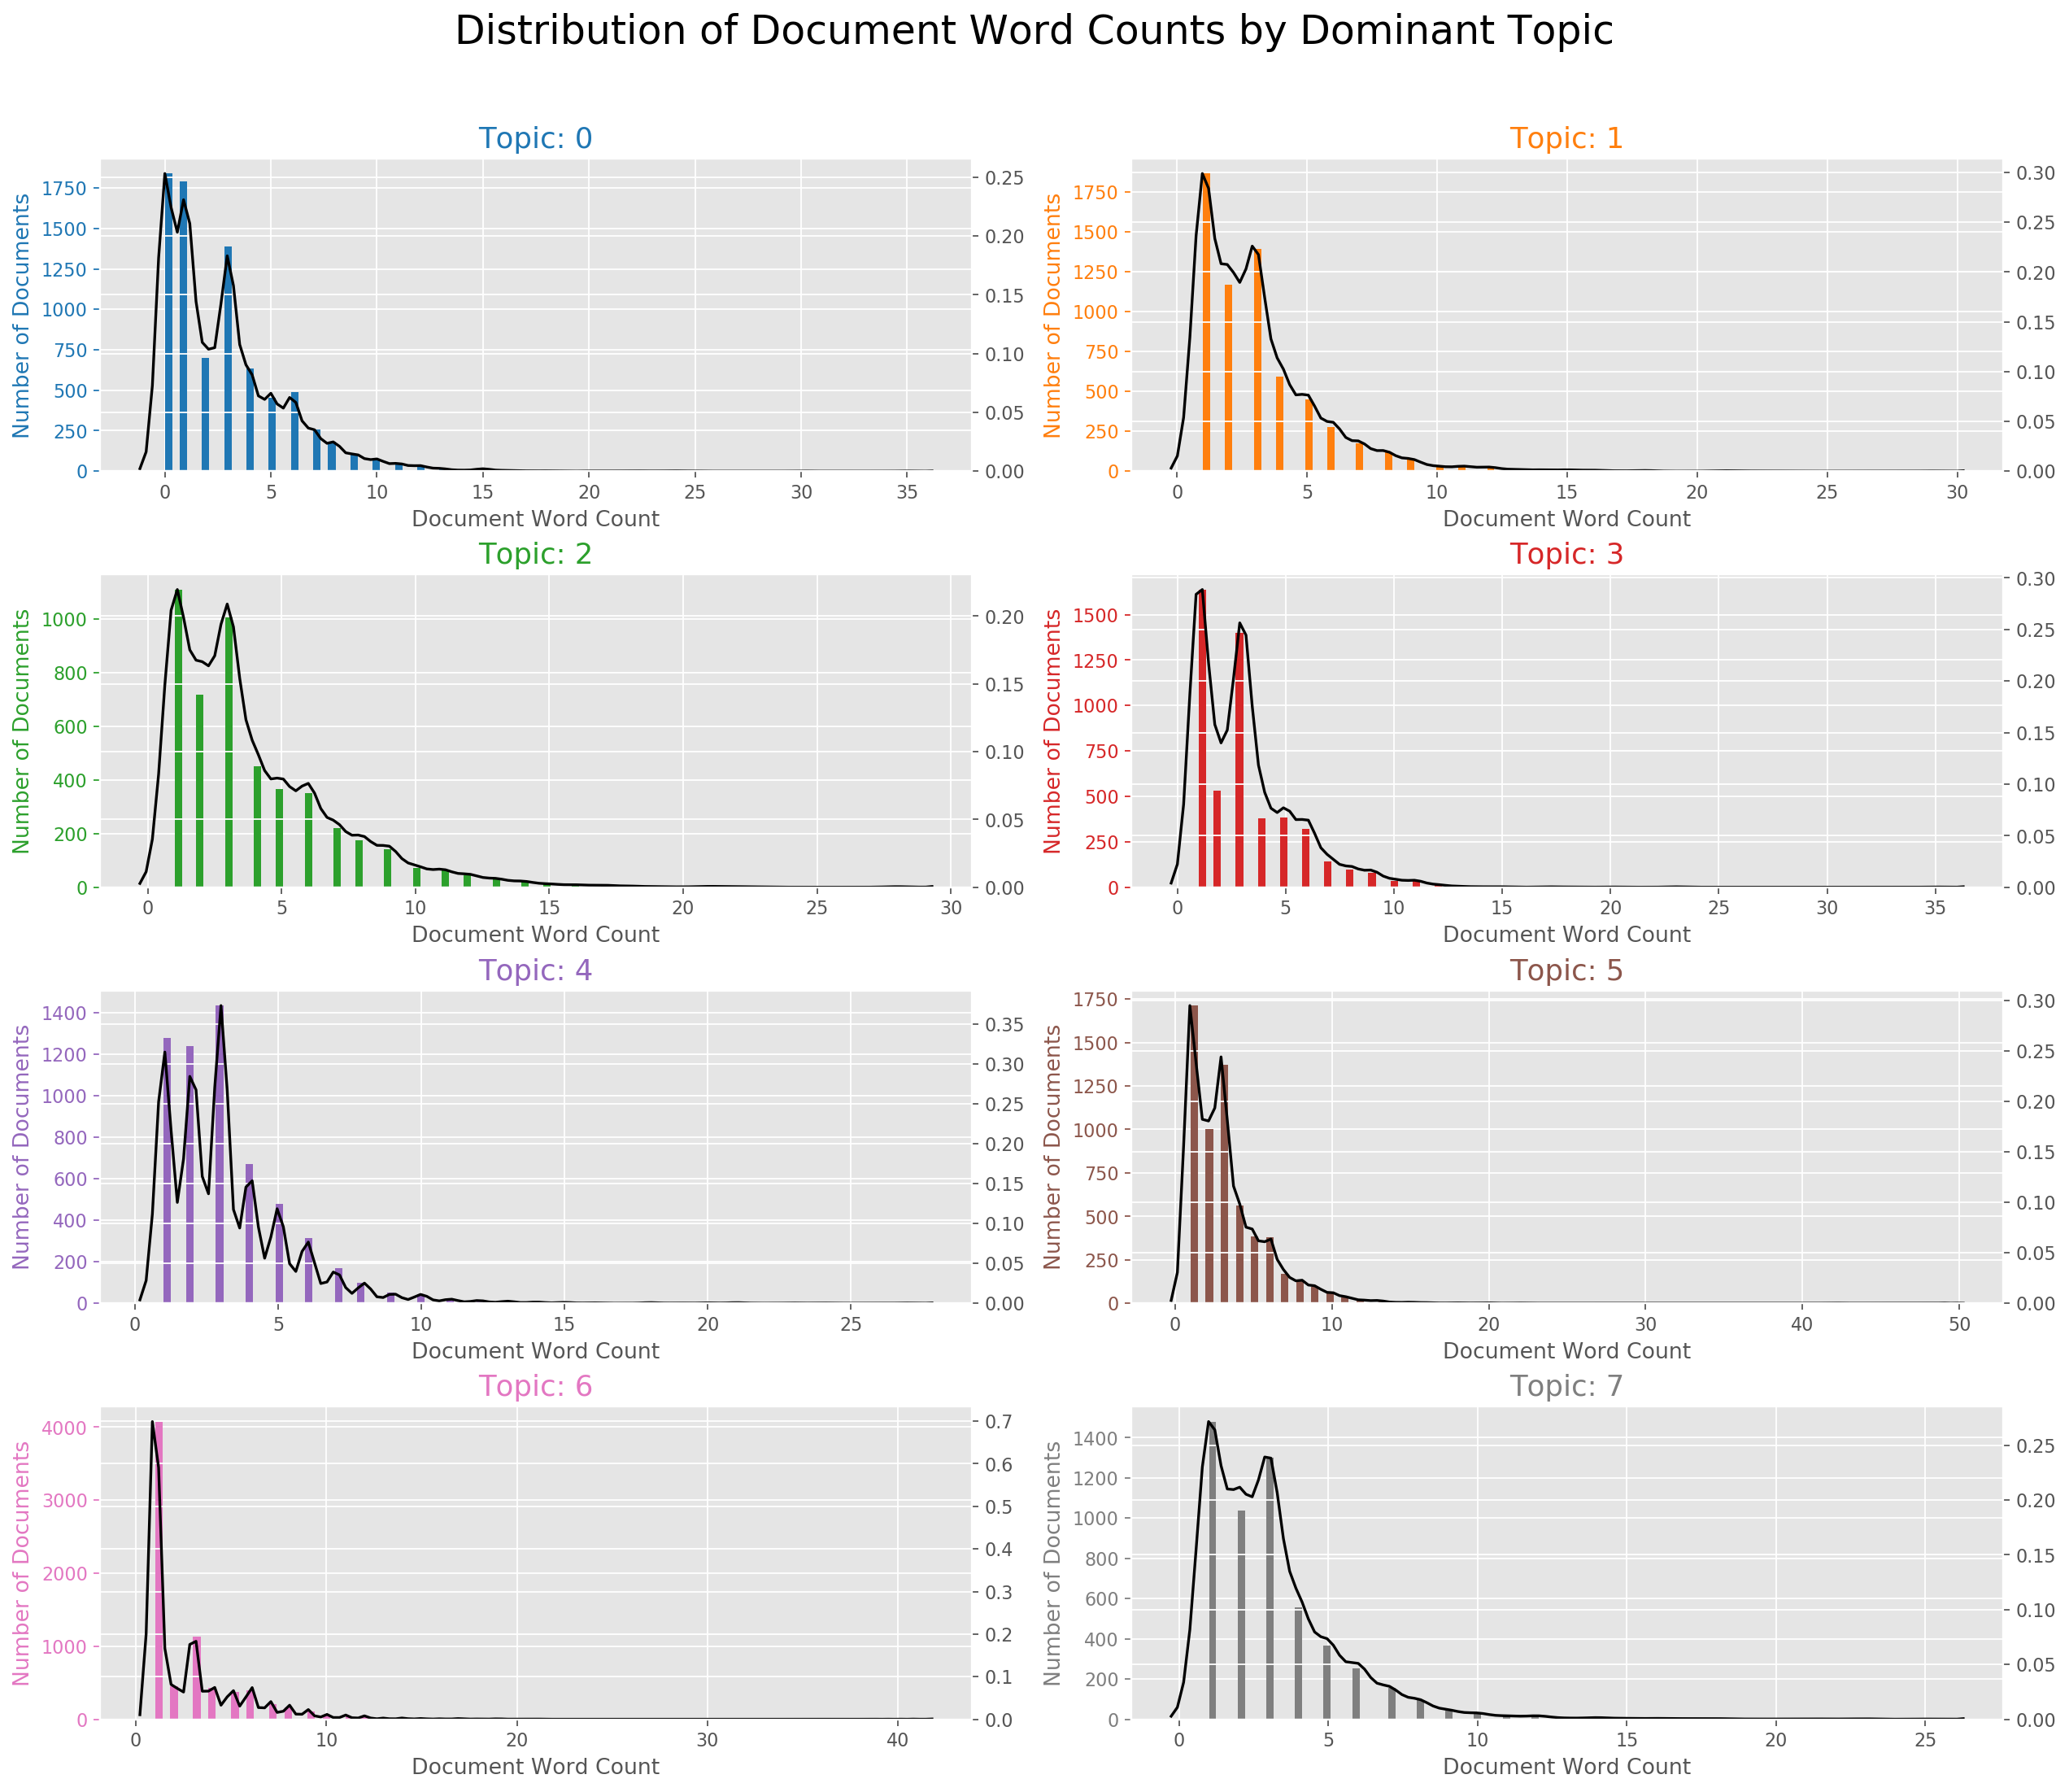

In [90]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(int((optimal_model.num_topics+1)/2),2,figsize=(16,14), dpi=160)

for i, ax in enumerate(axes.flatten()):   
    print(i)
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins=100, color=cols[i%10])
    ax.tick_params(axis='y', labelcolor=cols[i%10], color=cols[i%10])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i%10])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i%10]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
# plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

# Bar Plot

[0 1 2 3 4 5 6 7]


,word,topic_id,importance,word_count
0,lunch,0,0.149127,2817
1,free,0,0.129592,2449
2,peopl,0,0.122975,2323
3,free_lunch,0,0.073690,1392
4,break,0,0.028216,533


['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
0
1
2
3
4
5
6
7


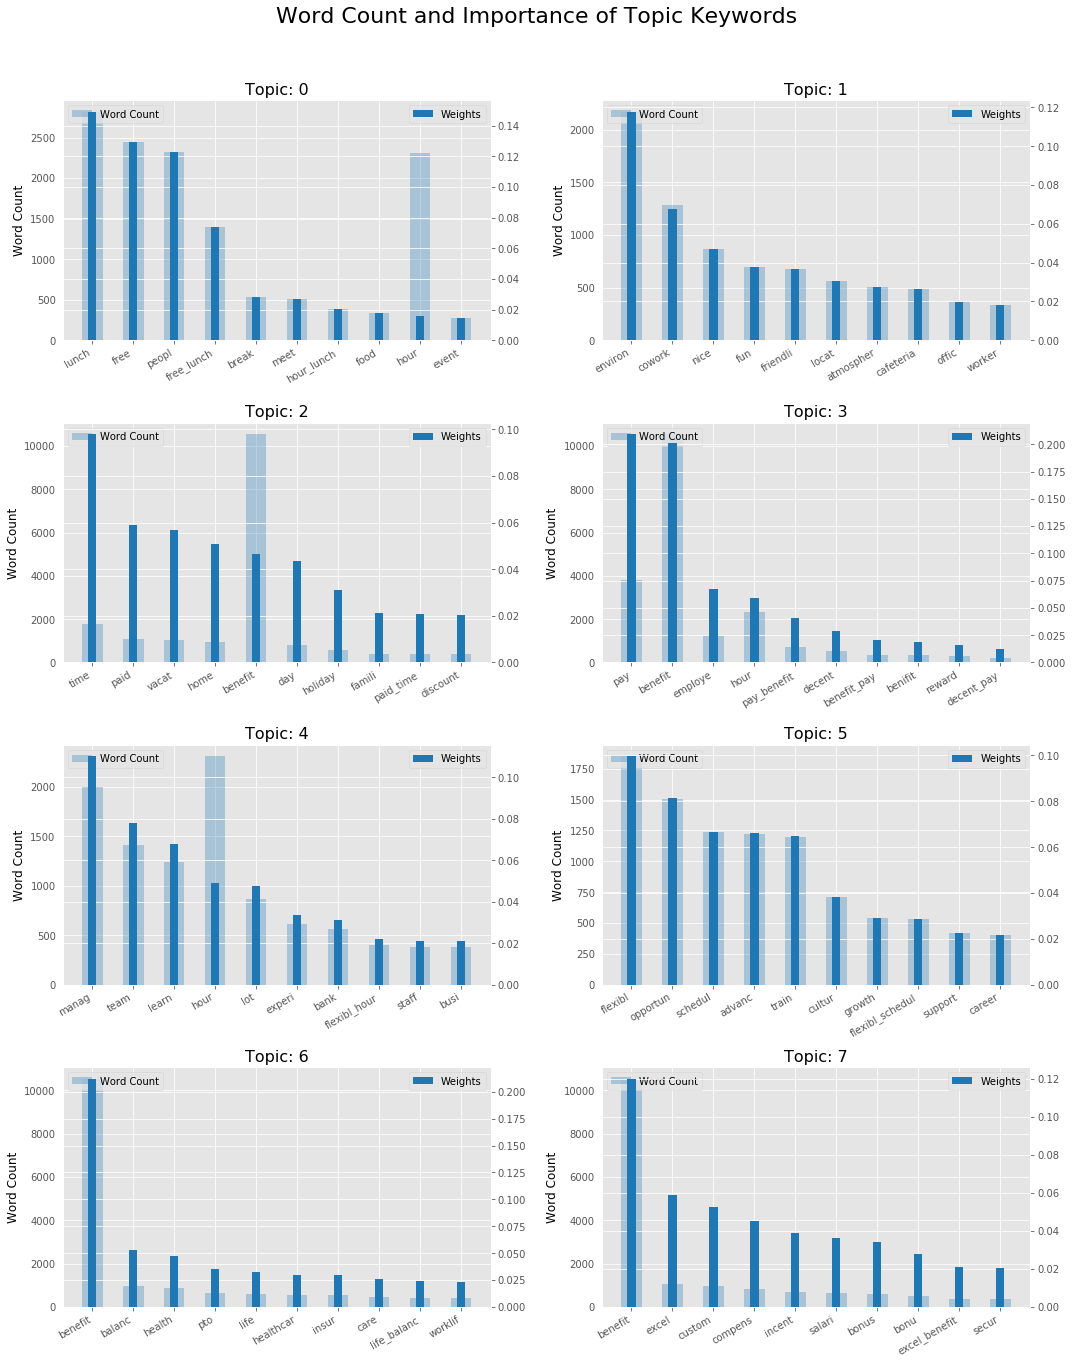

In [91]:
from collections import Counter

topics = optimal_model.show_topics(formatted=False, num_topics=num_topics)
data_flat = [w for w_list in data_px for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])   
print(df.topic_id.unique())
display(df.head())
# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(4, 2, figsize=(15,18))
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
print(cols)
for i, ax in enumerate(axes.flatten()):
    print(i)
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[0], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[0], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color='black')
#     ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color='black', fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)  

# img_path = root + '/Desktop/workspace/indeed/Job-Satisfaction/img/topics_kw/pros'
# img_flag = True

# if not os.path.exists(img_path):
#     os.makedirs(img_path)
    
# if img_flag:
#     plt.savefig(img_path+'/1-50_pros_600iter_10topics.png')
# plt.savefig(root+'/Desktop/paper_fig/lda/con/top-ten-words.png')
plt.show()

# Stacked Bar Chart

In [92]:
df1 = df.copy()

In [93]:
df = pd.DataFrame()
for i in range(num_topics):
    df.insert(i, f"{i+1}", np.round(df1.loc[df1.topic_id==i, :]["importance"].to_numpy(), 2), True) 
# df.append(df.sum(numeric_only=True), ignore_index=True)
remain = 1-df.sum().to_numpy()
print(remain)
df.loc[len(df)] = remain
df = df.T
df

[0.4  0.55 0.55 0.32 0.52 0.48 0.49 0.54]


,0,1,2,3,4,5,6,7,8,9,10
1,0.15,0.13,0.12,0.07,0.03,0.03,0.02,0.02,0.02,0.01,0.40
2,0.12,0.07,0.05,0.04,0.04,0.03,0.03,0.03,0.02,0.02,0.55
3,0.10,0.06,0.06,0.05,0.05,0.04,0.03,0.02,0.02,0.02,0.55
4,0.21,0.20,0.07,0.06,0.04,0.03,0.02,0.02,0.02,0.01,0.32
5,0.11,0.08,0.07,0.05,0.05,0.03,0.03,0.02,0.02,0.02,0.52
6,0.10,0.08,0.07,0.07,0.06,0.04,0.03,0.03,0.02,0.02,0.48
7,0.21,0.05,0.05,0.04,0.03,0.03,0.03,0.03,0.02,0.02,0.49
8,0.12,0.06,0.05,0.05,0.04,0.04,0.03,0.03,0.02,0.02,0.54


In [94]:
# print(imp_words)
# for words_list in imp_words:
#     words_list.append("others")
# df1.loc[df1.topic_id==i, :]["word"].to_list()
imp_words1 = []

for i in range(num_topics): 
    words = df1.loc[df1.topic_id==i, :]["word"].to_list()
    words.append("others")
#     print(words)
    imp_words1.append(words)
imp_words1

[['lunch',
  'free',
  'peopl',
  'free_lunch',
  'break',
  'meet',
  'hour_lunch',
  'food',
  'hour',
  'event',
  'others'],
 ['environ',
  'cowork',
  'nice',
  'fun',
  'friendli',
  'locat',
  'atmospher',
  'cafeteria',
  'offic',
  'worker',
  'others'],
 ['time',
  'paid',
  'vacat',
  'home',
  'benefit',
  'day',
  'holiday',
  'famili',
  'paid_time',
  'discount',
  'others'],
 ['pay',
  'benefit',
  'employe',
  'hour',
  'pay_benefit',
  'decent',
  'benefit_pay',
  'benifit',
  'reward',
  'decent_pay',
  'others'],
 ['manag',
  'team',
  'learn',
  'hour',
  'lot',
  'experi',
  'bank',
  'flexibl_hour',
  'staff',
  'busi',
  'others'],
 ['flexibl',
  'opportun',
  'schedul',
  'advanc',
  'train',
  'cultur',
  'growth',
  'flexibl_schedul',
  'support',
  'career',
  'others'],
 ['benefit',
  'balanc',
  'health',
  'pto',
  'life',
  'healthcar',
  'insur',
  'care',
  'life_balanc',
  'worklif',
  'others'],
 ['benefit',
  'excel',
  'custom',
  'compens',
  'inc

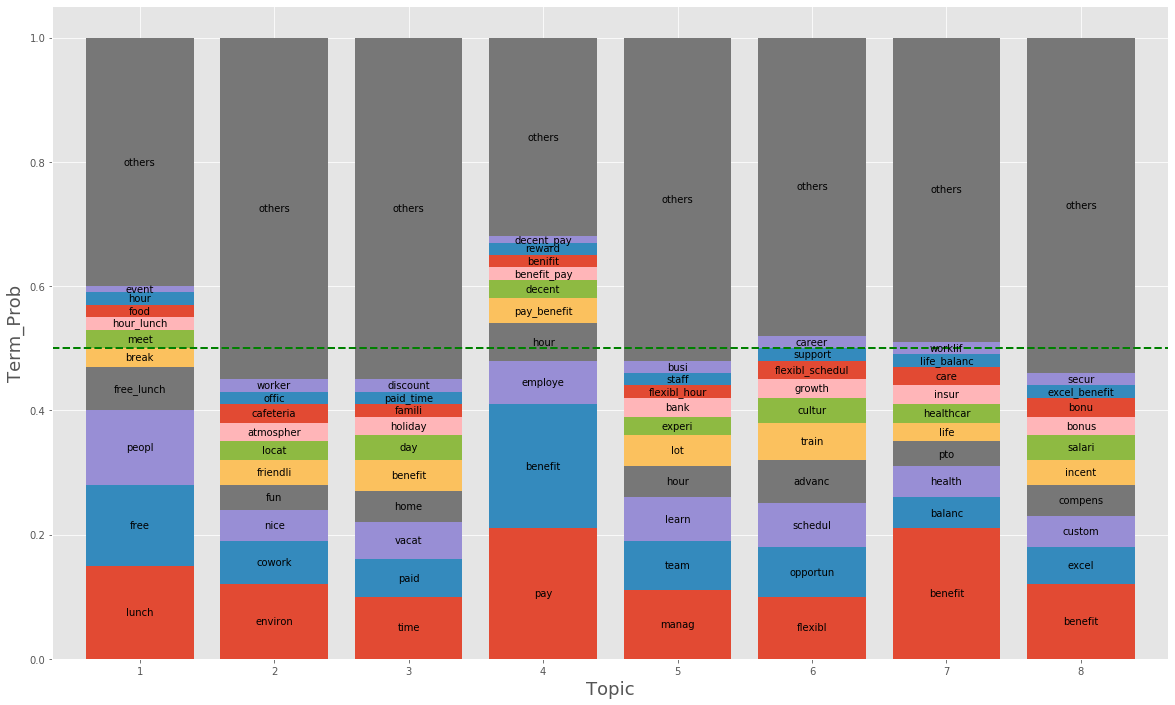

In [95]:
plt.style.use('ggplot')
threshold = .5

ax = df.plot(stacked=True, kind='bar', figsize=(20, 12), rot='horizontal', width=.8)

# .patches is everything inside of the chart
i = 0
j = 0
for rect in ax.patches:
#     print(rect)
    # Find where everything is located
#     words = imp_words[i]
#     i += 1
    
    height = round(rect.get_height(), 2)
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The width of the bar is the data value and can used as the label
#     label_text = f'{height}'  # f'{height:.2f}' to format decimal values
    label_text = f'{imp_words1[i][j]}'
    i += 1
    if(i == num_topics): 
        i = 0
        j += 1
#     print(i, j)
    
    # ax.text(x, y, text)
    label_x = x + width - width/2 # adjust 0.2 to center the label
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) 
ax.get_legend().remove()
ax.set_ylabel("Term_Prob", fontsize=18)
ax.set_xlabel("Topic", fontsize=18)
plt.axhline(y=threshold,linewidth=2, color='g', ls="--")


plt.savefig(root+f'/Desktop/workspace/indeed/Job-Satisfaction/data/sector/{sector}/{pc_flag}/lda/top-ten-words2.png')
plt.show() 

# Clustering

In [126]:
from collections import OrderedDict
def get_doc_topic_dist(model=optimal_model, corpus=corpus, kwords=False):
    
    '''
    LDA transformation, for each doc only returns topics with non-zero weight
    This function makes a matrix transformation of docs in the topic space.
    '''
    top_dist =[]
    keys = []

    for d in corpus:
        tmp = {i:0 for i in range(num_topics)}
        tmp.update(dict(model[d]))
        vals = list(OrderedDict(tmp).values())
        top_dist += [np.array(vals)]
        if kwords:
            keys += [np.array(vals).argmax()]

    return np.array(top_dist), keys


def explore_topic(lda_model, topic_number, topn, output=True):
    """
    accept a ldamodel, atopic number and topn vocabs of interest
    prints a formatted list of the topn terms
    """
    terms = []
    for term, frequency in lda_model.show_topic(topic_number, topn=topn):
        terms += [term]
        if output:
            print(u'{:20} {:.3f}'.format(term, round(frequency, 3)))
    
    return terms


In [127]:
topic_summaries = []
for i in range(num_topics):
    tmp = explore_topic(optimal_model,topic_number=i, topn=3, output=False )
    topic_summaries += [tmp[:5]]
    
topic_label = [" ".join(t) for t in topic_summaries]
print(topic_label)

['environ friendli fun', 'pay benefit pay_benefit', 'team balanc cultur', 'opportun train advanc', 'benefit excel salari', 'free food free_food', 'lot learn experi', 'peopl nice meet', 'employe discount product', 'time paid vacat', 'free lunch free_lunch', 'flexibl schedul home', 'custom day servic', 'manag cowork benefit', 'hour break lunch', 'health care coffe']


In [128]:
top_labels = dict()

for i in range(num_topics):
    top_labels[i] = topic_label[i]
    
print(top_labels)

{0: 'environ friendli fun', 1: 'pay benefit pay_benefit', 2: 'team balanc cultur', 3: 'opportun train advanc', 4: 'benefit excel salari', 5: 'free food free_food', 6: 'lot learn experi', 7: 'peopl nice meet', 8: 'employe discount product', 9: 'time paid vacat', 10: 'free lunch free_lunch', 11: 'flexibl schedul home', 12: 'custom day servic', 13: 'manag cowork benefit', 14: 'hour break lunch', 15: 'health care coffe'}


In [129]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = TfidfVectorizer(
#                             analyzer='word',       
#                              min_df=10,                        # minimum reqd occurences of a word 
#                              stop_words='english',             # remove stop words
#                              lowercase=True                   # convert all words to lowercase
#                              token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             # max_features=50000,             # max number of uniq words
                            )

sents = [s[0] for s in sentences[['Px_Texts']].values.tolist()]
data_vectorized = vectorizer.fit_transform(sents).toarray() ##dtm

In [130]:
top_dist, lda_keys= get_doc_topic_dist(optimal_model, corpus, True)
features = vectorizer.get_feature_names()

In [132]:
print(len(top_dist))
threshold = 0.1
# threshold = 1/num_topics
_idx = np.amax(top_dist, axis=1) > threshold  # idx of doc that above the threshold

X_topic = top_dist[_idx]
print(len(X_topic))

33624
20676


In [133]:
dtm = data_vectorized

In [134]:
p_df = pd.DataFrame()
p_df['tokenz'] = np.asarray(data_px)[_idx]
p_df.head()

,tokenz
0,"[benefit, break, discount, reason, schedul, time, benefit_discount, discount_break]"
1,"[amaz, break, cowork, fast, fun, hour, pace, fast_pace, hour_break]"
2,"[break, enforc, hour, lunch, hour_lunch, lunch_break, hour_lunch_break]"
3,"[hour, lunch, schedul, usual, hour_lunch]"
4,"[discount, food, free, time, discount_free, free_food, discount_free_food]"


In [135]:
top_ws = []
for n in range(len(dtm)):
    inds = np.int0(np.argsort(dtm[n])[::-1][:4])
    tmp = [features[i] for i in inds]    
    top_ws += [' '.join(tmp)]


p_df['Text_Rep'] = pd.DataFrame(np.asarray(top_ws)[_idx])
p_df['clusters'] = pd.DataFrame(np.asarray(lda_keys)[_idx])
# print(p_df['clusters'].isna().sum())
# p_df['clusters'].fillna(num_topics, inplace=True)
p_df['Review_Text'] = pd.DataFrame(sentences[['Review_Text']].values[_idx])

colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5", 
    "#c7c7c8", "#bcbd23", "#dbdb8e", "#17beca", 
])

cluster_colors = dict()
for c in range(num_topics): 
    cluster_colors[c] = colormap[c]
    
p_df['colors'] = p_df['clusters'].apply(lambda l: cluster_colors[l])

In [136]:
from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2)
tsne = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')

X_tsne = tsne.fit_transform(X_topic)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 20676 samples in 0.021s...
[t-SNE] Computed neighbors for 20676 samples in 8.398s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20676
[t-SNE] Computed conditional probabilities for sample 2000 / 20676
[t-SNE] Computed conditional probabilities for sample 3000 / 20676
[t-SNE] Computed conditional probabilities for sample 4000 / 20676
[t-SNE] Computed conditional probabilities for sample 5000 / 20676
[t-SNE] Computed conditional probabilities for sample 6000 / 20676
[t-SNE] Computed conditional probabilities for sample 7000 / 20676
[t-SNE] Computed conditional probabilities for sample 8000 / 20676
[t-SNE] Computed conditional probabilities for sample 9000 / 20676
[t-SNE] Computed conditional probabilities for sample 10000 / 20676
[t-SNE] Computed conditional probabilities for sample 11000 / 20676
[t-SNE] Computed conditional probabilities for sample 12000 / 20676
[t-SNE] Computed conditional probabilities for sam

In [137]:
p_df['X_tsne'] =X_tsne[:, 0]
p_df['Y_tsne'] =X_tsne[:, 1]

In [138]:
display(p_df.head())

,tokenz,Text_Rep,clusters,Review_Text,colors,X_tsne,Y_tsne
0,"[benefit, break, discount, reason, schedul, time, benefit_discount, discount_break]",discount_break reason benefit_discount schedul,8,"Benefits, discounts, breaks are scheduled on time and reasonable.",#9467bd,20.282898,-0.169407
1,"[amaz, break, cowork, fast, fun, hour, pace, fast_pace, hour_break]",hour_break amaz fast_pace pace,0,"fast paced, fun, hour breaks, amazing coworkers",#1f77b4,-8.381573,-11.568920
2,"[break, enforc, hour, lunch, hour_lunch, lunch_break, hour_lunch_break]",enforc hour_lunch_break lunch_break hour_lunch,14,Enforced hour long lunch breaks,#7f7f7f,51.948017,28.339703
3,"[hour, lunch, schedul, usual, hour_lunch]",usual hour_lunch schedul hour,14,"Hour lunch, usually work with your schedule.",#7f7f7f,32.799351,21.274605
4,"[discount, food, free, time, discount_free, free_food, discount_free_food]",discount_free_food discount_free free_food food,5,"discount, and free food at times",#98df8a,28.625469,-37.027500


In [139]:
from bokeh.plotting import figure, show, output_notebook, save#, output_file
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource
output_notebook()

Loading BokehJS ...

In [140]:
source = ColumnDataSource(dict(
    x=p_df['X_tsne'],
    y=p_df['Y_tsne'],
    color=p_df['colors'],
    label=p_df['clusters'].apply(lambda l: top_labels[l]),
    topic_key= p_df['clusters'],
    content = p_df['tokenz'],
    review_text = p_df['Review_Text']
))

In [1]:
title = 'T-SNE visualization of topics'

plot_lda = figure(plot_width=1000, plot_height=600,
                     title=title, tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
                     x_axis_type=None, y_axis_type=None, min_border=1)

plot_lda.scatter(x='x', y='y', legend='label', source=source,
                 color='color', alpha=0.8)#'msize', )

# hover tools
hover = plot_lda.select(dict(type=HoverTool))
hover.tooltips = {"content": "KeyWords: @content <br> ReviewText: @review_text <br> Topic: @label "}
plot_lda.legend.location = "top_left"

show(plot_lda)

#save the plot
# img_path = root + '/Desktop/workspace/indeed/Job-Satisfaction/img/companies/clustering/cons'
save(plot_lda, root+'/Desktop/paper_fig/lda/pro/tsne-viz.html')

NameError: name 'figure' is not defined